# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 13-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari


### <font color='blue'>Business Goals:</font>
1. Retaining high profitable customers is the number one business goal.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <font color='blue'>Analysis Goals:</font>
1. Predict which customers are at high risk of churn
2. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
3. Prepaid is the most common model in India and southeast Asia. Focus on prepaid customers.
3. Curn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
4. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
5. especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase
---------------------------

# <font color='blue'>PART 1: DATA UNDERSTANDING AND CLEANING</font>

1. Understand the properties of loaded dataframe
2. Idnetify Uniquness key
3. Identify bad colums that has no infromation (all entries are null or same)
4. Conver dates to meaningful number of days
5. Remove columns with data that does not make much sense for our analysis
6. Missing value treatment: replace with '0', mean or median; drop rows; drop columns
7. Outlier Treatment
8. Write data into a clean data file. This will be used to create master-df for analysis

#### <font color='red'>TODO: Compute Loss of data at each cleaning step</font>

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data.csv', low_memory=False)
telecom = telecom_orig.copy()

In [2]:
# Understand the properties of loaded dataframe
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


## Categorical Variables
There are 8 of them and all of these have more than 60% missing values.
Missing values can be imputed with '-1' where -1 can be treated as a new category.

CATEGORICAL VARIABLES:
* night_pck_user_6
* night_pck_user_7
* night_pck_user_8
* night_pck_user_9
* fb_user_6
* fb_user_7
* fb_user_8
* fb_user_9

In [3]:
# Missing values can be imputed with '-1' 
# where -1 can be treated as a new category.

categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in categorical_vars:
    telecom[var].fillna(value=-1, inplace=True)

## Fix Dates & convert to meaningful numbers
1. Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
2. convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before number of days to month end)

In [4]:
# covert date columns to python datetime format
date_vars = ["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", 
 "date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8", 
 "date_of_last_rech_data_6", "date_of_last_rech_data_7",  "date_of_last_rech_data_8"]
telecom[date_vars].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
1,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/31/2014,8/28/2014,NaN,7/25/2014,8/10/2014
2,6/30/2014,7/31/2014,8/31/2014,6/17/2014,7/24/2014,8/14/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/26/2014,7/28/2014,8/9/2014,6/4/2014,NaN,NaN


In [5]:
# convert to datetime
for col in date_vars:
    telecom[col] = pd.to_datetime(telecom[col])

print(telecom[date_vars].info())
telecom[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
last_date_of_month_6        99999 non-null datetime64[ns]
last_date_of_month_7        99398 non-null datetime64[ns]
last_date_of_month_8        98899 non-null datetime64[ns]
date_of_last_rech_6         98392 non-null datetime64[ns]
date_of_last_rech_7         98232 non-null datetime64[ns]
date_of_last_rech_8         96377 non-null datetime64[ns]
date_of_last_rech_data_6    25153 non-null datetime64[ns]
date_of_last_rech_data_7    25571 non-null datetime64[ns]
date_of_last_rech_data_8    26339 non-null datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 6.9 MB
None


,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-30,2014-07-31,2014-08-31,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
1,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-31,2014-08-28,NaT,2014-07-25,2014-08-10
2,2014-06-30,2014-07-31,2014-08-31,2014-06-17,2014-07-24,2014-08-14,NaT,NaT,NaT
3,2014-06-30,2014-07-31,2014-08-31,2014-06-28,2014-07-31,2014-08-31,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-06-26,2014-07-28,2014-08-09,2014-06-04,NaT,NaT


In [6]:
# Create new days columns, instead of date

telecom["rech_days_left_6"]      = (telecom.last_date_of_month_6 - telecom.date_of_last_rech_6).astype('timedelta64[D]')
telecom["rech_days_left_data_6"] = (telecom.last_date_of_month_6 - telecom.date_of_last_rech_data_6).astype('timedelta64[D]')
telecom["rech_days_left_7"]      = (telecom.last_date_of_month_7 - telecom.date_of_last_rech_7).astype('timedelta64[D]')
telecom["rech_days_left_data_7"] = (telecom.last_date_of_month_7 - telecom.date_of_last_rech_data_7).astype('timedelta64[D]')
telecom["rech_days_left_8"]      = (telecom.last_date_of_month_8 - telecom.date_of_last_rech_8).astype('timedelta64[D]')
telecom["rech_days_left_data_8"] = (telecom.last_date_of_month_8 - telecom.date_of_last_rech_data_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_data_6", "rech_days_left_7", "rech_days_left_data_7", "rech_days_left_8", "rech_days_left_data_8"]
#print(telecom[day_columns].head(10))
print(telecom[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 6 columns):
rech_days_left_6         98392 non-null float64
rech_days_left_data_6    25153 non-null float64
rech_days_left_7         98232 non-null float64
rech_days_left_data_7    25571 non-null float64
rech_days_left_8         96377 non-null float64
rech_days_left_data_8    26339 non-null float64
dtypes: float64(6)
memory usage: 4.6 MB
None


In [7]:
# Drop all old date columns: add dates columns to drop_column list
telecom.drop(date_vars, axis=1, inplace=True)
telecom1 = telecom.copy()

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  9
Dataframe Shape:  (99999, 223)


## Missing Value Treatment
1. Delete: Delete the missing values 
2. Impute: 
    - Imputing by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc. 
    - Predictive techniques: Use statistical models such as k-NN, SVM etc. to predict and impute missing values

#### COLUMN-WISE: MISSING VALUES

In [8]:
# summing up the missing values (column-wise)
telecom.isnull().sum()

mobile_number                0
circle_id                    0
loc_og_t2o_mou            1018
std_og_t2o_mou            1018
loc_ic_t2o_mou            1018
last_date_of_month_9      1659
arpu_6                       0
arpu_7                       0
arpu_8                       0
arpu_9                       0
onnet_mou_6               3937
onnet_mou_7               3859
onnet_mou_8               5378
onnet_mou_9               7745
offnet_mou_6              3937
offnet_mou_7              3859
offnet_mou_8              5378
offnet_mou_9              7745
roam_ic_mou_6             3937
roam_ic_mou_7             3859
roam_ic_mou_8             5378
roam_ic_mou_9             7745
roam_og_mou_6             3937
roam_og_mou_7             3859
roam_og_mou_8             5378
roam_og_mou_9             7745
loc_og_t2t_mou_6          3937
loc_og_t2t_mou_7          3859
loc_og_t2t_mou_8          5378
loc_og_t2t_mou_9          7745
                         ...  
monthly_2g_7                 0
monthly_

In [9]:
# Percentage of missing values (column-wise)
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
loc_og_t2t_mou_8         5.38
loc_og_t2t_mou_9         7.75
                         ... 
monthly_2g_7             0.00
monthly_2g_8             0.00
monthly_2g

In [10]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_9   74.08
total_rech_data_6          74.85
total_rech_data_7          74.43
total_rech_data_8          73.66
total_rech_data_9          74.08
max_rech_data_6            74.85
max_rech_data_7            74.43
max_rech_data_8            73.66
max_rech_data_9            74.08
count_rech_2g_6            74.85
count_rech_2g_7            74.43
count_rech_2g_8            73.66
count_rech_2g_9            74.08
count_rech_3g_6            74.85
count_rech_3g_7            74.43
count_rech_3g_8            73.66
count_rech_3g_9            74.08
av_rech_amt_data_6         74.85
av_rech_amt_data_7         74.43
av_rech_amt_data_8         73.66
av_rech_amt_data_9         74.08
arpu_3g_6                  74.85
arpu_3g_7                  74.43
arpu_3g_8                  73.66
arpu_3g_9                  74.08
arpu_2g_6                  74.85
arpu_2g_7                  74.43
arpu_2g_8                  73.66
arpu_2g_9                  74.08
rech_days_left_data_6      74.85
rech_days_

In [11]:
# Treat missing values
# Columns used for filtering high-value customers, can't be dropped
# total_rech_data_6 
# total_rech_data_7 
# av_rech_amt_data_6 
# av_rech_amt_data_7 

# All these columns has more than 70% missing values

print(telecom.total_rech_data_6.describe()); print_ln()
print(telecom.total_rech_data_7.describe()); print_ln()
print(telecom.av_rech_amt_data_6.describe()); print_ln()
print(telecom.av_rech_amt_data_7.describe()); print_ln()

count   25153.00
mean        2.46
std         2.79
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        61.00
Name: total_rech_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean        2.67
std         3.03
min         1.00
25%         1.00
50%         1.00
75%         3.00
max        54.00
Name: total_rech_data_7, dtype: float64
-------------------------------------------------------------------------------- 

count   25153.00
mean      192.60
std       192.65
min         1.00
25%        82.00
50%       154.00
75%       252.00
max      7546.00
Name: av_rech_amt_data_6, dtype: float64
-------------------------------------------------------------------------------- 

count   25571.00
mean      200.98
std       196.79
min         0.50
25%        92.00
50%       154.00
75%       252.00
max      4365.00
Name: av_rech_amt_data_7, dtype: float64
---------------------------------------------

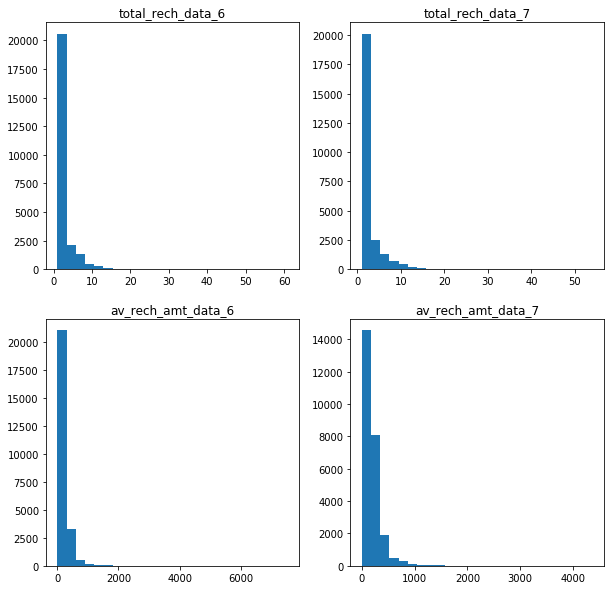

In [12]:
# Let us look at the distribution to find out the value to fill

# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(),bins=25)

plt.show()

In [13]:
# Variables are numeric and distribution resemble the 'power law'. 
# The minimum value is 1, and not zero, 
# The rows with missing values also have the 'dates of recharge' columns 
# missing -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed with 0.

telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [14]:
# Column analysis % of missing values
print(round(100*(telecom.isnull().sum()/len(telecom.index)), 2)); print_ln()

# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
loc_og_t2t_mou_7         3.86
loc_og_t2t_mou_8         5.38
loc_og_t2t_mou_9         7.75
                         ... 
monthly_2g_7             0.00
monthly_2g_8             0.00
monthly_2g

In [15]:
drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
telecom.drop(drop_missing_values_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  24
Dataframe Shape:  (99999, 199)


## Filter high-value customers

In [16]:
# New DERIVED Columns for Total Data Recharge Amount

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]*telecom['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)

In [17]:
# Filter high-value customers
avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                      telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)

telecom = telecom[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 195)


## Tag churners and remove attributes of the churn phase

In [18]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)
#telecom["churn"].head(10)

# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(telecom) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
telecom.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', telecom.shape); print_ln();

Number of columns droped here  =  48
Dataframe Shape:  (30001, 148)
-------------------------------------------------------------------------------- 



## Identify columns that have no varience & Drop

In [19]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); print_ln();
drop_no_varience_columns = list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); print_ln();
drop_no_varience_columns += list(telecom_unique_count_is_one.index)

telecom.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', telecom.shape); print_ln();
print('Number of columns dropped here  = ', len(drop_no_varience_columns))

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 

Dataframe Unique Value Count is ONE (all same values): 
 std_og_t2c_mou_7    1
std_ic_t2o_mou_8    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_6    1
std_og_t2c_mou_8    1
loc_ic_t2o_mou      1
std_og_t2o_mou      1
loc_og_t2o_mou      1
circle_id           1
std_og_t2c_mou_6    1
dtype: int64
-------------------------------------------------------------------------------- 

Dataframe Shape:  (30001, 138)
-------------------------------------------------------------------------------- 

Number of columns dropped here  =  10


In [20]:
telecom.head(5) 

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,...,30.40,0.00,101.20,9.00,15.00,23.00,252.00,252.00,252.00,1
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,57.74,19.38,18.74,3.00,6.00,5.00,0.00,0.00,0.00,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,21.03,910.65,122.16,5.00,0.00,1.00,0.00,354.00,207.00,0
21,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
23,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,40.45,51.86,0.00,12.00,24.00,7.00,0.00,712.00,540.00,0


#### ROW-WISE: MISSING VALUES

In [21]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  telecom.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = telecom.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


0        54
77       27
91        1
111      27
188      28
191       1
358      27
364      27
414      28
423      27
527      27
539      54
588       1
603       2
679       1
687      82
690      28
723      28
788      27
845      28
895      27
933      27
934      27
1138     54
1255     27
1374      1
1489     54
1500     55
1524     28
1555     56
         ..
98790    55
98823    28
98838     1
98872    28
98943    81
98962    27
98971     1
99000    27
99034    27
99070    27
99135    81
99142    81
99195    27
99224     2
99246    27
99296    27
99313     1
99323    27
99338    81
99391    27
99398    28
99436    28
99515     1
99611    27
99625    27
99672     1
99700    27
99790    55
99827    27
99851    56
Length: 1838, dtype: int64

In [22]:
# drop rows with missing values greater >= 27
telecom = telecom[telecom.isnull().sum(axis=1) < 27]
telecom.shape

(28504, 138)

In [23]:
rows_missing_data = telecom.isnull().sum(axis=1)
print(rows_missing_data)
print(rows_missing_data[rows_missing_data > 0])

7        0
8        0
21       0
23       0
33       0
38       0
41       0
48       0
53       0
56       0
57       0
61       0
67       0
69       0
73       0
86       0
87       0
91       1
92       0
96       0
101      0
102      0
103      0
104      0
105      0
115      0
124      0
131      0
133      0
134      0
        ..
99896    0
99899    0
99902    0
99903    0
99904    0
99921    0
99922    0
99923    0
99924    0
99925    0
99927    0
99929    0
99931    0
99935    0
99937    0
99939    0
99941    0
99942    0
99947    0
99955    0
99957    0
99959    0
99963    0
99965    0
99970    0
99981    0
99984    0
99986    0
99988    0
99997    0
Length: 28504, dtype: int64
91       1
191      1
588      1
603      2
679      1
1374     1
1913     1
2777     1
3757     1
4284     1
4814     1
4934     1
5187     1
5449     1
5798     1
5926     1
7304     1
7399     1
7567     1
7662     1
7914     1
8118     1
8159     1
8281     1
8454     1
8680     1
8979     1
9012

In [24]:
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df>0]

rech_days_left_6   0.12
rech_days_left_7   0.18
rech_days_left_8   0.97
dtype: float64

In [25]:
telecom['rech_days_left_6'].describe()

count   28471.00
mean        3.39
std         4.49
min         0.00
25%         0.00
50%         2.00
75%         4.00
max        29.00
Name: rech_days_left_6, dtype: float64

In [26]:
# imputing Lattitude and Longitude by mean values
telecom.loc[np.isnan(telecom['rech_days_left_6']), ['rech_days_left_6']] = telecom['rech_days_left_6'].median()
telecom.loc[np.isnan(telecom['rech_days_left_7']), ['rech_days_left_7']] = telecom['rech_days_left_7'].median()
telecom.loc[np.isnan(telecom['rech_days_left_8']), ['rech_days_left_8']] = telecom['rech_days_left_8'].median()

round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number           0.00
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             0.00
onnet_mou_7             0.00
onnet_mou_8             0.00
offnet_mou_6            0.00
offnet_mou_7            0.00
offnet_mou_8            0.00
roam_ic_mou_6           0.00
roam_ic_mou_7           0.00
roam_ic_mou_8           0.00
roam_og_mou_6           0.00
roam_og_mou_7           0.00
roam_og_mou_8           0.00
loc_og_t2t_mou_6        0.00
loc_og_t2t_mou_7        0.00
loc_og_t2t_mou_8        0.00
loc_og_t2m_mou_6        0.00
loc_og_t2m_mou_7        0.00
loc_og_t2m_mou_8        0.00
loc_og_t2f_mou_6        0.00
loc_og_t2f_mou_7        0.00
loc_og_t2f_mou_8        0.00
loc_og_t2c_mou_6        0.00
loc_og_t2c_mou_7        0.00
loc_og_t2c_mou_8        0.00
loc_og_mou_6            0.00
loc_og_mou_7            0.00
                        ... 
vol_3g_mb_8             0.00
night_pck_user_6        0.00
night_pck_user_7        0.00
night_pck_user

In [27]:
telecom.isnull().sum().sum()

0

In [28]:
telecom.shape

(28504, 138)

# Oulier Treatment
- Use data distribution to find outliers

In [29]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_days_left_6,rech_days_left_7,rech_days_left_8,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
count,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,...,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00,28504.00
mean,7001213864.75,560.38,570.63,526.06,265.25,275.93,244.73,379.89,389.85,350.23,...,172.28,179.72,157.07,3.39,3.48,4.14,444.79,527.56,469.51,0.06
std,687776.04,448.96,480.08,500.75,458.72,482.67,464.02,479.25,502.60,485.65,...,422.69,445.65,414.41,4.49,4.29,5.08,1417.12,1481.60,1644.91,0.23
min,7000000074.00,-2258.71,-2014.05,-945.81,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7000622950.00,317.36,322.60,254.76,20.14,19.53,14.84,80.73,80.35,60.49,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
50%,7001217677.00,485.17,488.90,442.79,89.98,89.91,74.09,231.55,231.82,199.88,...,0.00,0.00,0.00,2.00,2.00,3.00,92.00,100.00,25.00,0.00
75%,7001806580.25,698.91,705.00,672.45,298.76,304.89,257.41,494.37,506.47,457.43,...,139.40,138.99,96.44,4.00,5.00,6.00,392.00,575.00,342.00,0.00
90%,7002165664.10,987.58,1001.34,991.09,760.84,801.71,688.28,898.93,931.20,844.92,...,590.46,614.06,526.66,10.00,9.00,10.00,1051.40,1374.00,1118.80,0.00
95%,7002285365.20,1232.63,1268.47,1267.39,1135.71,1206.17,1101.55,1256.09,1292.28,1187.34,...,948.15,985.74,878.06,14.00,13.00,15.00,2025.00,2424.00,2268.00,1.00
99%,7002385436.73,1955.15,1999.46,1989.92,2146.08,2220.47,2175.25,2301.03,2434.54,2219.38,...,1962.94,2075.25,1933.96,19.00,18.00,25.00,5129.73,6219.16,5749.82,1.00


In [30]:
# # TODO: DO WE NEED TO ROMOVE enteris due to outliers?
# num_vars = set(list(telecom)) - set(categorical_vars) - set(date_vars) - set(["mobile_number"])
# for var in num_vars:
#     telecom = telecom[np.abs(telecom[var]-telecom[var].mean()) <= (3*telecom[var].std())]


# # from scipy import stats
# # telecom  = telecom[(np.abs(stats.zscore(telecom)) < 3).all(axis=1)]

# print('Dataframe Shape: ', telecom.shape); print_ln();

### Checking the Churn Rate

In [31]:
churn = (sum(telecom['churn'])/len(telecom['churn'].index))*100
churn

5.5992141453831046

## PCA for categorical variables: 
To conduct PCA on categorical variables, you can use the following technique: For each category (level) of a categorical variable, compute the churn rate (i.e. no. of churn/non-churn + churn), which will be a number (fraction). Replace each categorical level with this number and conduct PCA on the transformed dataset. 

In [32]:
categorical_vars.remove('night_pck_user_9')
categorical_vars.remove('fb_user_9')
categorical_vars

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [33]:
#categorical_vars
for feature in categorical_vars:
    #feature = "night_pck_user_6"
    print(feature)
    x2 = telecom.groupby([feature, "churn"])["churn"].count().rename("count")
    y2 = x2 / x2.groupby(level=0).sum()
    y2 = y2.reset_index()
    y2.rename(columns={'count':feature+'_churn'}, inplace=True)

    telecom = telecom.reset_index(drop=True)
    y2 = y2.reset_index(drop=True)

    telecom = telecom.merge(y2,on=[feature,'churn'])
    telecom.drop(feature, axis=1, inplace=True)
    

night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8


### Save the clened data in new file

In [34]:
# write treated telecom file
telecom.to_csv("telecom_churn_data_clean_cat.csv", sep=',', index=False)

# <font color='blue'>SUMMARY: DATA CLEANING</font>



In [35]:
telecom.shape

(28504, 138)